# MINE implementation by Pytorch
https://github.com/sungyubkim/MINE-Mutual-Information-Neural-Estimation-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from MINE.model import Mine

x = np.random.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]], size = 300)
y = np.random.multivariate_normal(mean=[0,0], cov=[[1,0.8],[0.8,1]], size = 300)

In [2]:
from MINE.training import sample_batch, ma, train

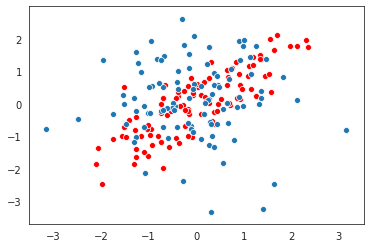

In [3]:
joint_data = sample_batch(y,batch_size=100,sample_mode='joint')
sns.scatterplot(x=joint_data[:,0],y=joint_data[:,1],color='red')
marginal_data = sample_batch(y,batch_size=100,sample_mode='marginal')
sns.scatterplot(x=marginal_data[:,0],y=marginal_data[:,1])

-5.04958e-06
-0.00028895633
-0.0001894816
7.6776996e-07
-0.000111649555
-2.2570102e-05


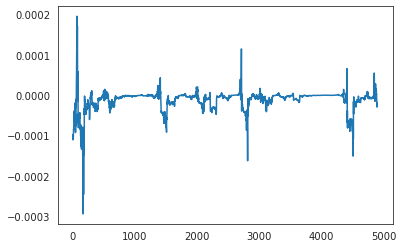

In [4]:
mine_net_indep = Mine().cuda()
mine_net_optim_indep = optim.Adam(mine_net_indep.parameters(), lr=1e-3)
result_indep = train(x, mine_net_indep, mine_net_optim_indep)
result_indep_ma = ma(result_indep)
print(result_indep_ma[-1])
plt.plot(range(len(result_indep_ma)),result_indep_ma)

0.45699328
0.6014906
0.40723133
0.7041423
0.71019936
0.55120206


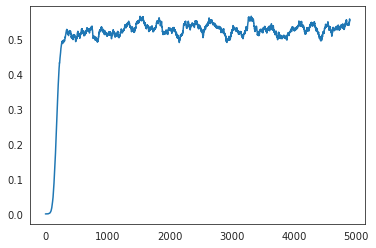

In [5]:
mine_net_cor = Mine().cuda()
mine_net_optim_cor = optim.Adam(mine_net_cor.parameters(), lr=1e-3)
result_cor = train(y, mine_net_cor, mine_net_optim_cor)
result_cor_ma = ma(result_cor)
print(result_cor_ma[-1])
plt.plot(range(len(result_cor_ma)),result_cor_ma)

[-0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9]
0.9016324
0.68146473
0.7853934
0.75994956
0.936897
0.44318444
0.57930183
0.28525203
0.5927402
0.40745687
0.3667165
0.372996
0.18694179
0.29206663
0.47188282
0.22605872
0.3934992
0.2252574
0.098095655
0.2165412
0.09721846
0.12615585
0.21503642
0.14352337
0.1136058
0.07350902
0.27663326
-0.023499966
0.13975796
-0.0012934655
0.047488786
0.010457411
0.087876365
0.015484937
0.042027824
2.6088986e-05
-7.501352e-05
-0.00073179416
0.025628183
0.0178959
-2.537081e-07
1.7374317e-05
-1.1295837e-05
2.6467635e-05
-2.822133e-05
-0.0004396179
-1.914279e-06
-0.00023010268
-3.278997e-05
1.9778963e-07
0.0011698877
-0.00055924035
0.0126330685
0.007948948
0.07292885
0.047750887
0.04754202
0.060830176
0.048687704
0.032742552
0.06611464
0.029480997
0.04684224
0.07415038
0.049658593
0.090894975
0.09165481
0.30348203
0.15288743
0.18500388
0.20804158
0.06342048
0.08138613
0.2418347
0.16325001
0.20332658
0.08296296

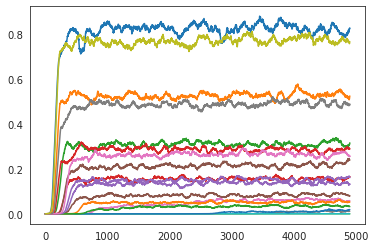

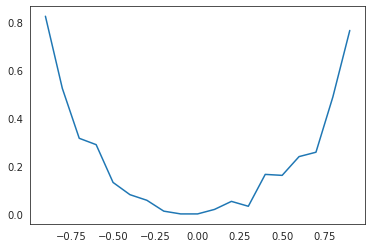

In [6]:
correlations = np.linspace(-0.9,0.9,19)
print(correlations)
final_result = []
for rho in correlations:
    rho_data = np.random.multivariate_normal(mean=[0,0], cov=[[1,rho],[rho,1]], size = 300)
    mine_net = Mine().cuda()
    mine_net_optim = optim.Adam(mine_net.parameters(), lr=1e-3)
    result = train(rho_data, mine_net, mine_net_optim)
    result_ma = ma(result)
    final_result.append(result_ma[-1])
    plt.plot(range(len(result_ma)),result_ma)
plt.show()
plt.plot(correlations, final_result)
plt.show()